In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Electric_Production.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
value_col = 'IPG2211A2N'

In [ ]:
def moving_average_smoothing(data, window_size=12):
    """
    Apply moving average smoothing to remove trend
    window_size: number of periods to average (default 12 for monthly data)
    """
    # Calculate moving average
    smoothed = data[value_col].rolling(window=window_size, center=True).mean()

    # Calculate the trend (original - smoothed)
    trend = data[value_col] - smoothed

    # Create a new dataframe with results
    result_df = pd.DataFrame({
        'Original': data[value_col],
        'Smoothed': smoothed,
        'Trend': trend,
        'Detrended': smoothed
    })
    return result_df

In [ ]:
def exponential_smoothing(data, alpha=0.3):
    """
    Apply exponential smoothing to remove trend
    alpha: smoothing factor between 0 and 1 (higher = more weight to recent values)
    """
    # Calculate exponential smoothing
    smoothed = data[value_col].ewm(alpha=alpha, adjust=False).mean()

    # Calculate the trend
    trend = data[value_col] - smoothed

    # Create a new dataframe with results
    result_df = pd.DataFrame({
        'Original': data[value_col],
        'Smoothed': smoothed,
        'Trend': trend,
        'Detrended': smoothed
    })
    return result_df

In [ ]:
ma_results = moving_average_smoothing(df)
exp_results = exponential_smoothing(df)

In [ ]:
def plot_results(original_data, ma_data, exp_data):
    # Create figure with specified size
    plt.figure(figsize=(15, 20))  # Increased height to accommodate vertical arrangement

    # Plot 1: Original vs Smoothed series
    plt.subplot(4, 1, 1)  # Changed to 4 rows, 1 column, position 1
    plt.plot(original_data[value_col], label='Original')
    plt.plot(ma_data['Smoothed'], label='Moving Average')
    plt.plot(exp_data['Smoothed'], label='Exponential')
    plt.title('Original vs Smoothed Series')
    plt.legend()

    # Plot 2: Moving Average Trend
    plt.subplot(4, 1, 2)  # Position 2
    plt.plot(ma_data['Trend'], label='MA Trend')
    plt.title('Moving Average Trend')
    plt.legend()

    # Plot 3: Exponential Trend
    plt.subplot(4, 1, 3)  # Position 3
    plt.plot(exp_data['Trend'], label='Exp Trend')
    plt.title('Exponential Smoothing Trend')
    plt.legend()

    # Plot 4: Detrended series
    plt.subplot(4, 1, 4)  # Position 4
    plt.plot(ma_data['Detrended'], label='MA Detrended')
    plt.plot(exp_data['Detrended'], label='Exp Detrended')
    plt.title('Detrended Series')
    plt.legend()

    plt.tight_layout()
    plt.show()

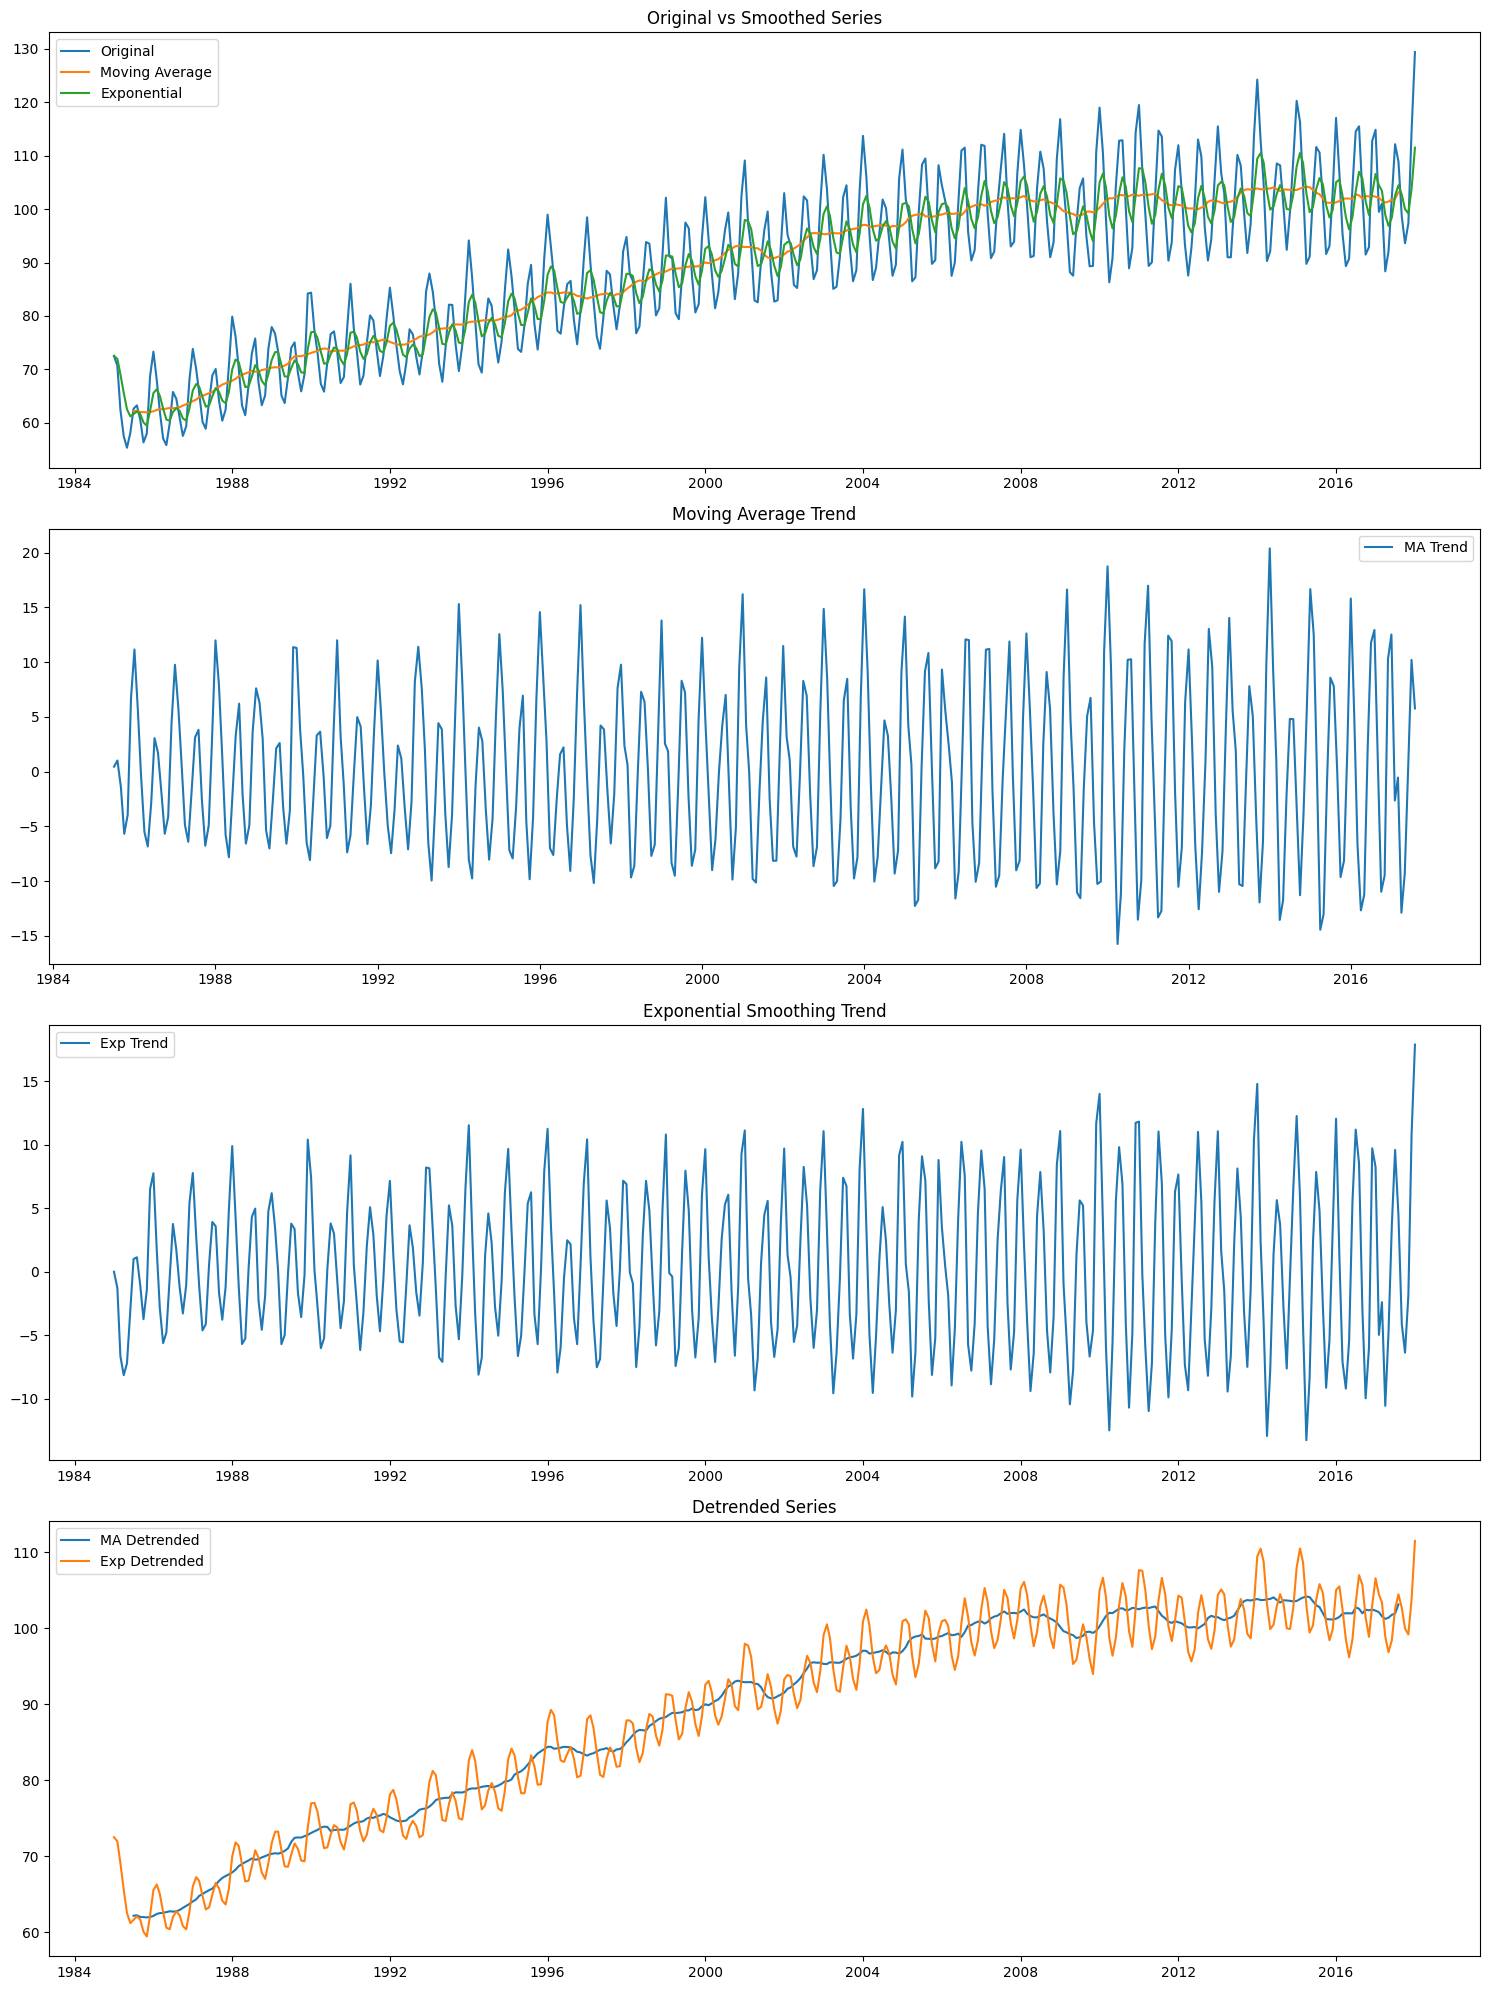

Moving Average Results Statistics:
         Original    Smoothed       Trend   Detrended
count  397.000000  386.000000  386.000000  386.000000
mean    88.847218   88.951847    0.069267   88.951847
std     15.387834   12.940367    7.661676   12.940367
min     55.315100   61.953067  -15.739708   61.953067
25%     77.105200   77.825965   -6.604710   77.825965
50%     89.779500   92.620742   -0.264513   92.620742
75%    100.524400  101.075960    5.671102  101.075960
max    129.404800  104.182550   20.392575  104.182550

Exponential Smoothing Results Statistics:
         Original    Smoothed       Trend   Detrended
count  397.000000  397.000000  397.000000  397.000000
mean    88.847218   88.617936    0.229282   88.617936
std     15.387834   13.528376    6.044035   13.528376
min     55.315100   59.436027  -13.268924   59.436027
25%     77.105200   76.960083   -4.630420   76.960083
50%     89.779500   91.882412   -0.481558   91.882412
75%    100.524400  100.004993    4.850619  100.004993
max 

In [ ]:
plot_results(df, ma_results, exp_results)
print("Moving Average Results Statistics:")
print(ma_results.describe())
print("\nExponential Smoothing Results Statistics:")
print(exp_results.describe())